<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

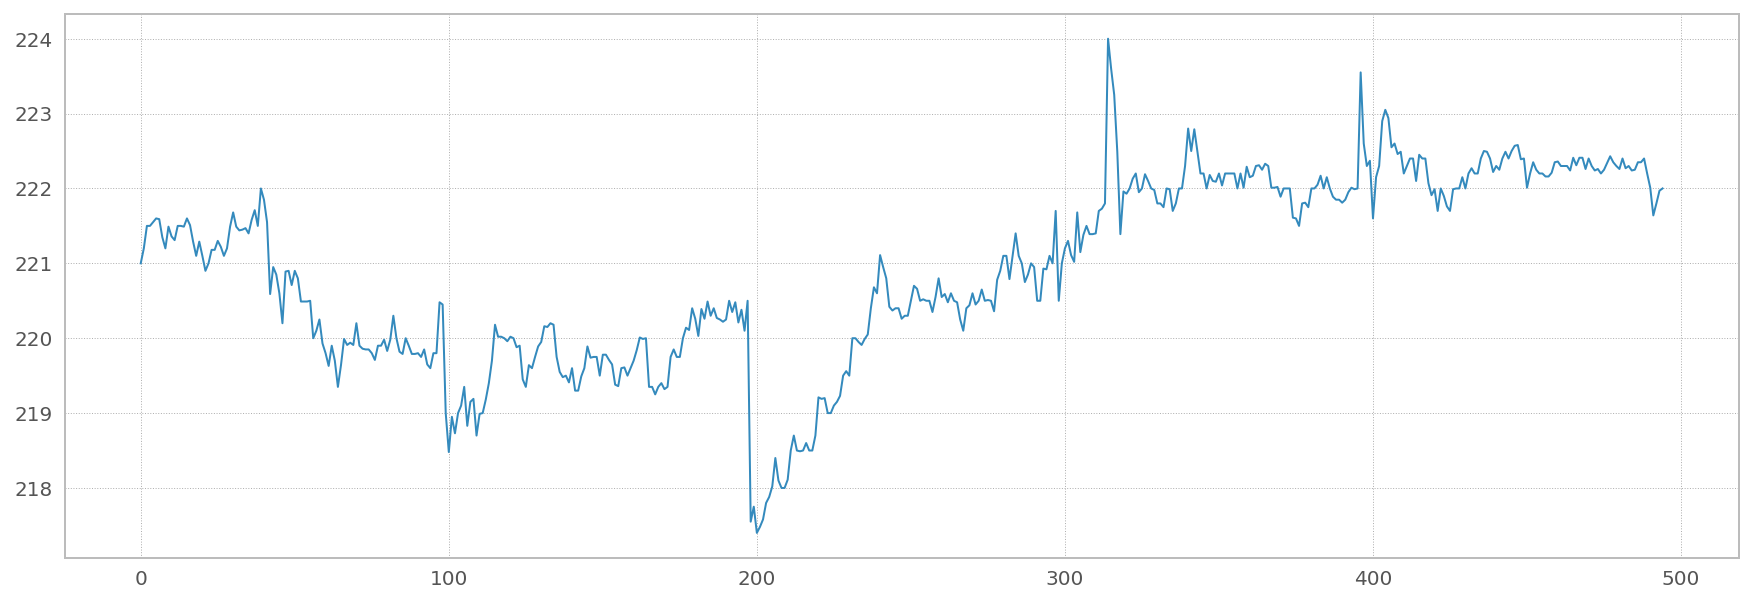

In [2]:
from utils import gen_CV, hurst, hl

gazp = pd.read_csv("gazp.csv", parse_dates=["Date"])
ts_ = gazp.sort_values("Date")["Close"].values

cv = gen_CV(gazp)

ts = ts_[cv[0][1]]
plt.plot(ts);

In [3]:
hurst(ts, 2)

Price lags of [2] are included


0.3787009499619082

In [4]:
hurst(ts, range(1, 10))

Price lags of [2, 3, 4, 5, 6, 7, 8, 9] are included


0.34177100852916076

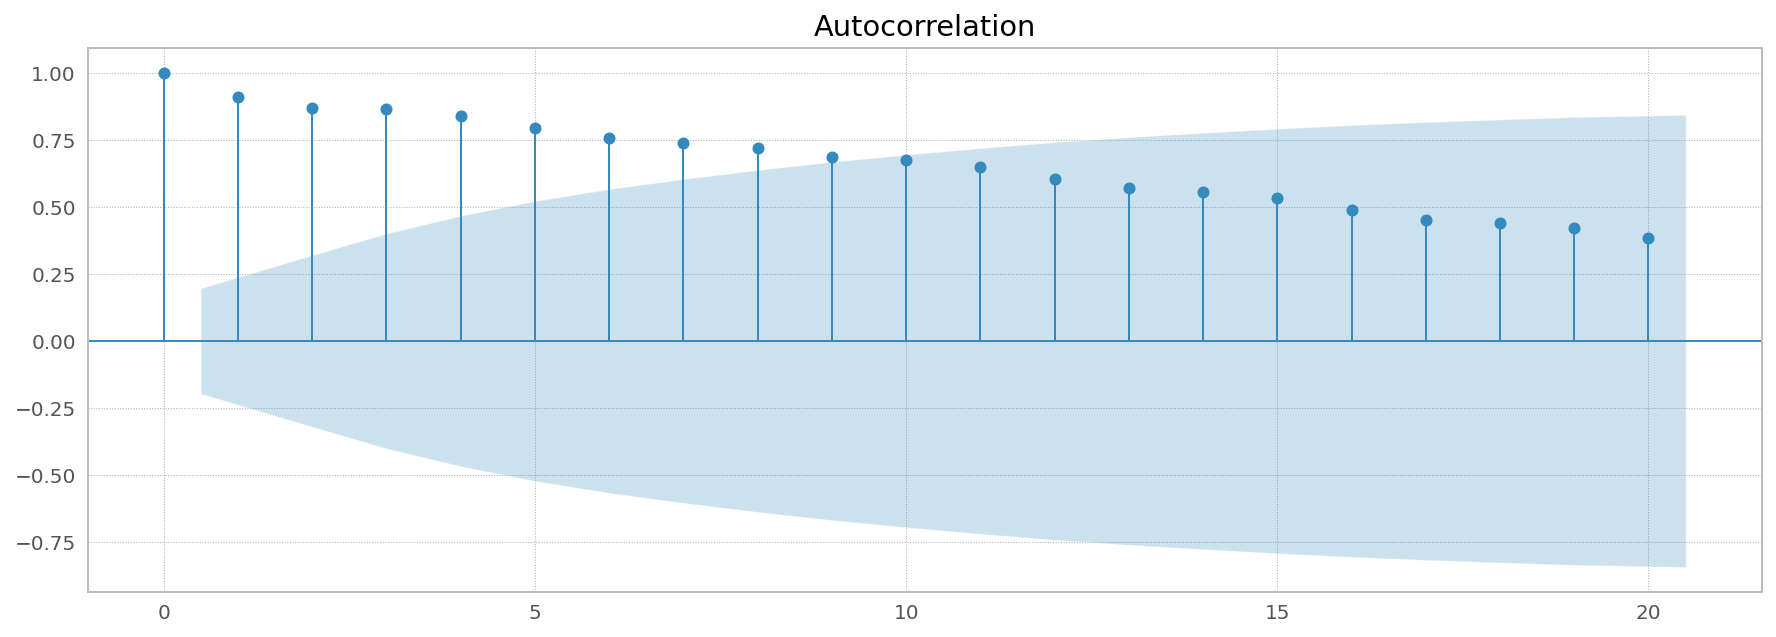

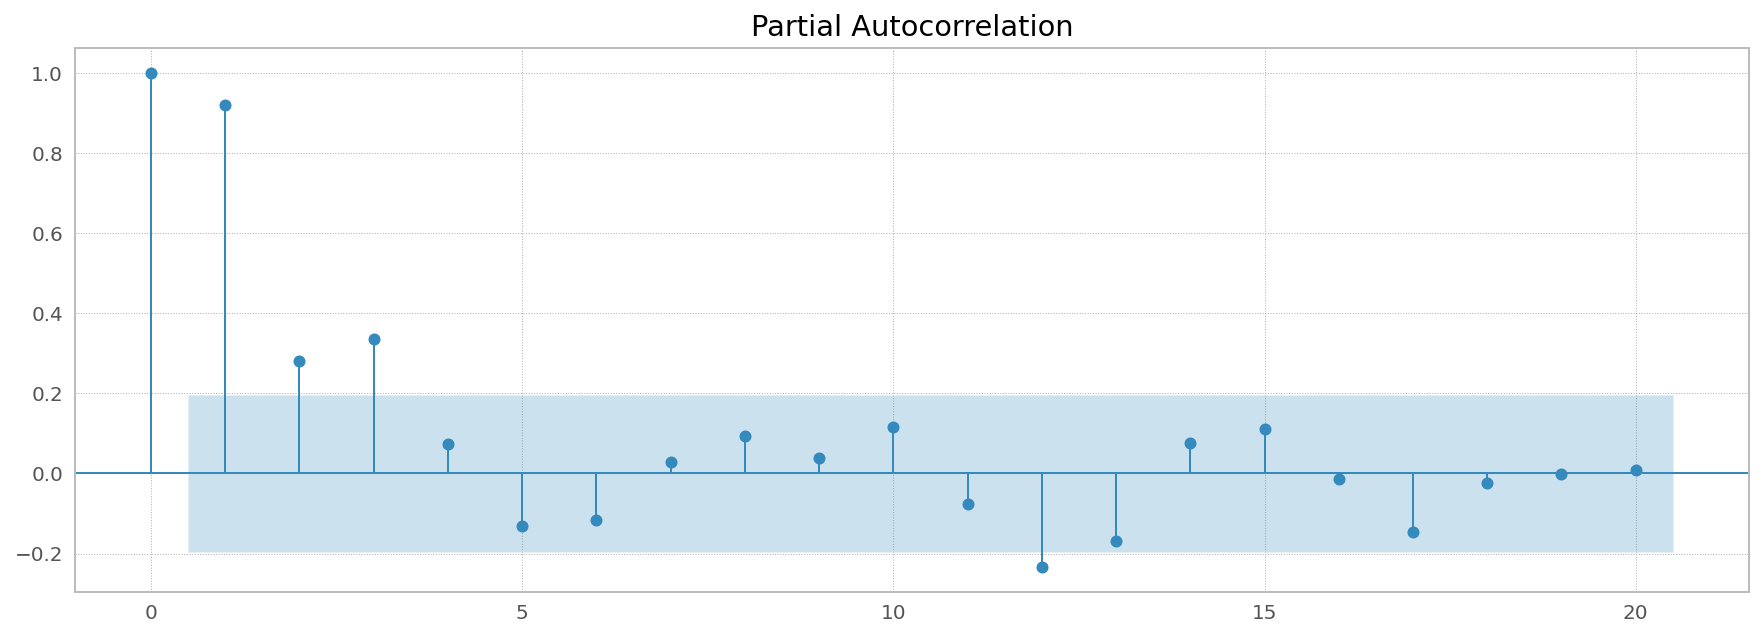

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts[:100])
plot_pacf(ts[:100]);

In [6]:
hl(ts)

24.901003062747087

In [7]:
hl(ts[:250])

12.36601499073388

Can `Ljung-Box` statistics have any impact on trading decisions?  

I think not, as serial correlation will be present in both trending and mean-reverting markets (perhaps in trending makets it will have longer memory). 

In [8]:
ljungbox(ts, 10, return_df=True)

,lb_stat,lb_pvalue
1,469.182857,4.825977e-104
2,919.745379,1.904709e-200
3,1353.093701,4.439772e-293
4,1772.294941,0.000000e+00
5,2181.056961,0.000000e+00
6,2580.814676,0.000000e+00
7,2974.543463,0.000000e+00
8,3359.326600,0.000000e+00
9,3736.946623,0.000000e+00
10,4108.937570,0.000000e+00


In [9]:
from arch.unitroot import VarianceRatio

VarianceRatio(np.log(ts))

Test Statistic,-2.258
P-value,0.024
Lags,2


In [10]:
VarianceRatio(np.log(ts[:250]))

Test Statistic,-1.332
P-value,0.183
Lags,2


0.000800912633344586


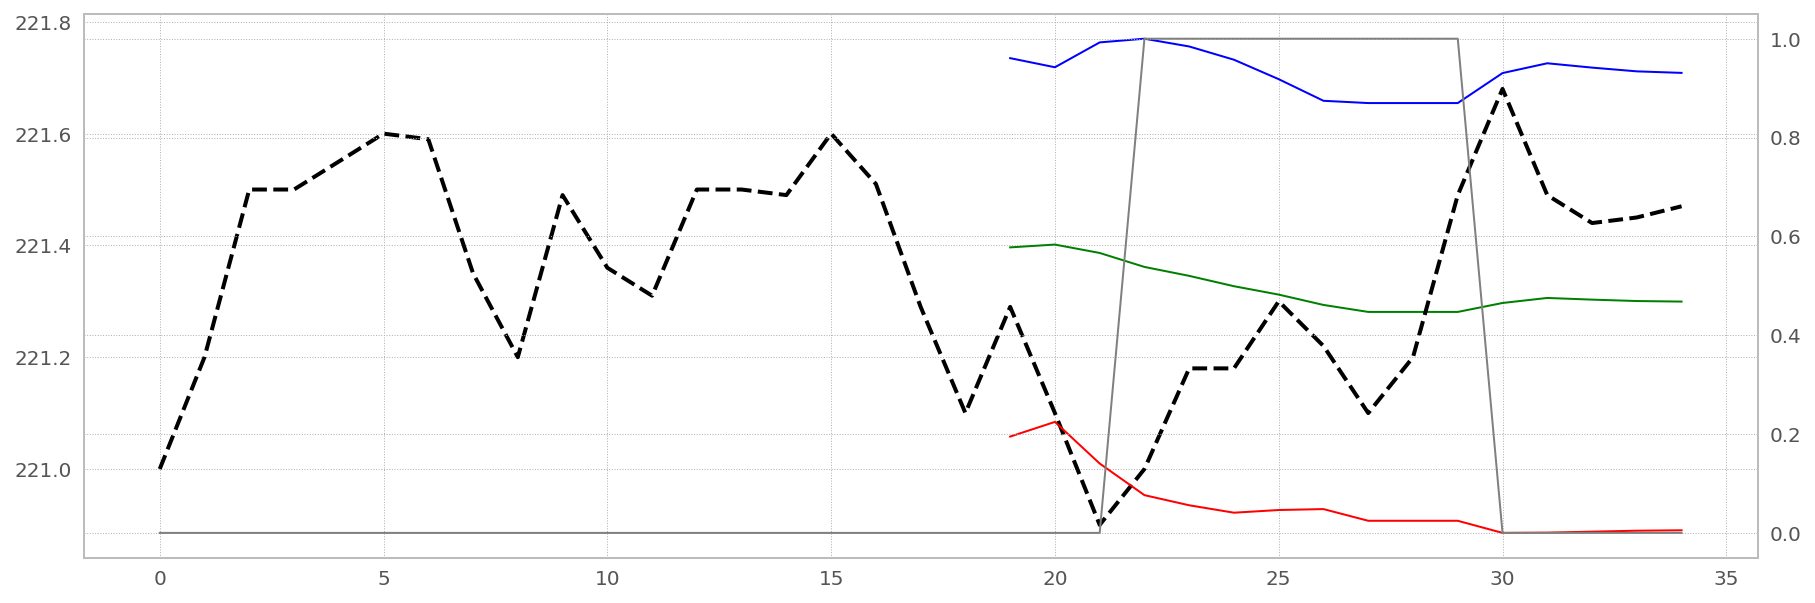

In [11]:
from talib import BBANDS
from utils import BBANDS_return, BBANDS_signal

ts_back = ts
ts = ts[:35]
upper, middle, lower = BBANDS(ts, 20 ,2)
signal = BBANDS_signal(ts, upper, middle, lower)
ret = BBANDS_return(ts, upper, middle, lower)
print(np.multiply.reduce(1 + ret) - 1)
 
_, ax = plt.subplots()
ax.plot(upper, color="blue")
ax.plot(middle, color="green")
ax.plot(ts, color="black", linestyle="--", linewidth=2)
ax.plot(lower, color="red")
ax2 = ax.twinx()
ax2.plot(signal, color="grey")
df = pd.DataFrame({
    "price": ts,
    "upper": upper,
    "middle": middle,
    "lower": lower,
    "signal": signal,
    "return": 1 + ret
})
ts = ts_back
# 0.000800912633344586

In [12]:
pd.options.display.max_rows = 300
df[20:]

,price,upper,middle,lower,signal,return
20,221.10,221.718755,221.4015,221.084245,0,1.000000
21,220.90,221.763237,221.3865,221.009763,0,1.000000
22,221.00,221.769827,221.3615,220.953173,1,1.000000
23,221.18,221.755938,221.3455,220.935062,1,0.999700
24,221.18,221.732221,221.3270,220.921779,1,1.000543
25,221.30,221.697414,221.3120,220.926586,1,0.999638
26,221.22,221.658755,221.2935,220.928245,1,0.999458
27,221.10,221.654679,221.2810,220.907321,1,1.000452
28,221.20,221.654679,221.2810,220.907321,1,1.001311
29,221.49,221.654679,221.2810,220.907321,1,1.000858


In [13]:
(221.49*(1-.0003)) / (221.18*1.0003 ) - 1
# 0.000800912633344586

0.000800912633344586

0.0017874063341152269


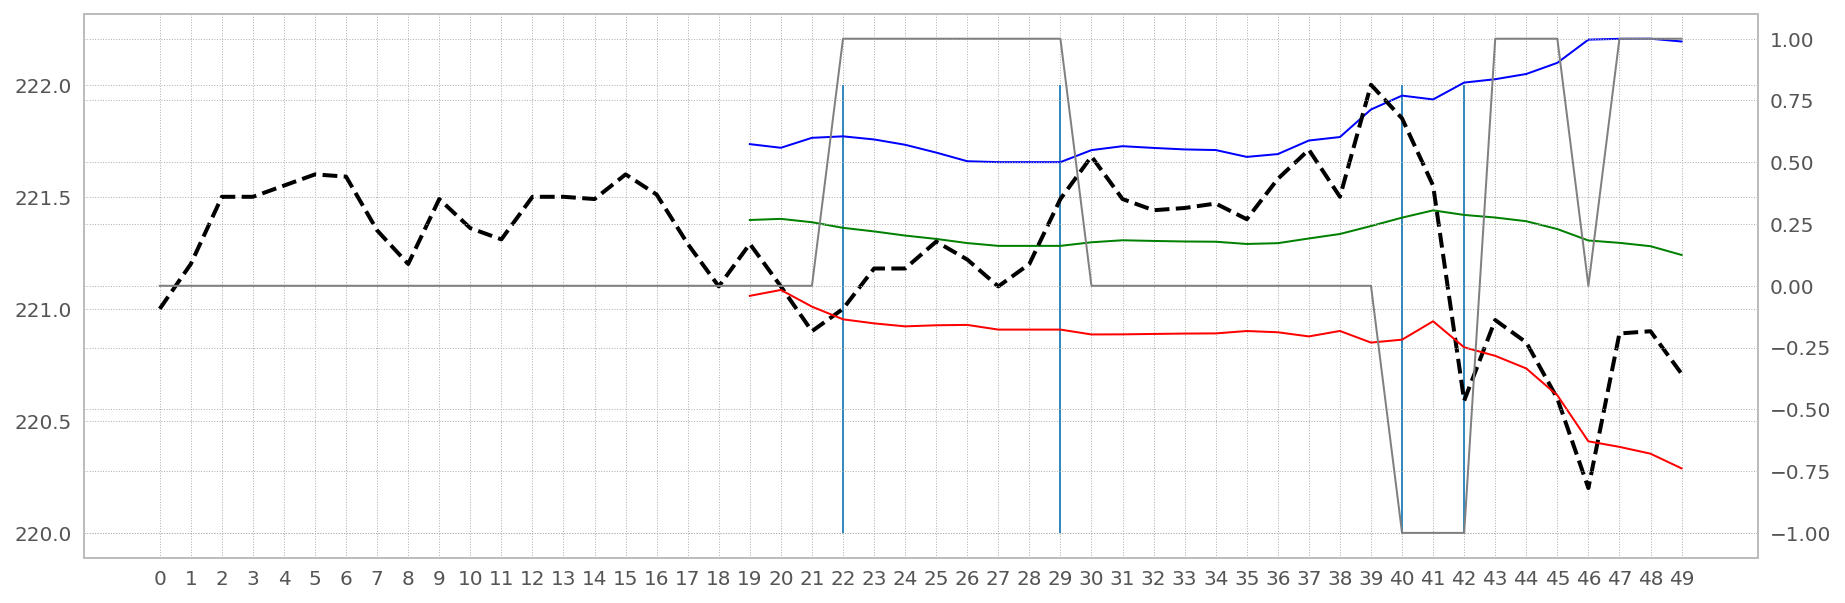

In [14]:
ts_back = ts
ts = ts[:50]
upper, middle, lower = BBANDS(ts, 20, 2, 2)
signal = BBANDS_signal(ts, upper, middle, lower)
ret = BBANDS_return(ts, upper, middle, lower)
print(np.multiply.reduce(1 + ret) - 1)
 
_, ax = plt.subplots()
ax.plot(upper, color="blue")
ax.plot(middle, color="green")
ax.plot(ts, color="black", linestyle="--", linewidth=2)
ax.plot(lower, color="red")
ax.set_xticks(range(50))
ax.vlines([22,29,40,42], 220, 222)
ax2 = ax.twinx()
ax2.plot(signal, color="grey")
df = pd.DataFrame({
    "price": ts,
    "upper": upper,
    "middle": middle,
    "lower": lower,
    "signal": signal,
    "return": 1 + ret
})
ts = ts_back
# 0.0017874063341152269

In [15]:
df[20:]

,price,upper,middle,lower,signal,return
20,221.10,221.718755,221.4015,221.084245,0,1.000000
21,220.90,221.763237,221.3865,221.009763,0,1.000000
22,221.00,221.769827,221.3615,220.953173,1,1.000000
23,221.18,221.755938,221.3455,220.935062,1,0.999700
24,221.18,221.732221,221.3270,220.921779,1,1.000543
25,221.30,221.697414,221.3120,220.926586,1,0.999638
26,221.22,221.658755,221.2935,220.928245,1,0.999458
27,221.10,221.654679,221.2810,220.907321,1,1.000452
28,221.20,221.654679,221.2810,220.907321,1,1.001311
29,221.49,221.654679,221.2810,220.907321,1,1.000858


In [16]:
((221.49*(1-.0003)) / (221.18*1.0003 ) * 
 (221.55 *(1 - .0003))/(220.85*1.0003) *
 (220.89 *(1- .0003)) / (220.85*1.0003) *
 (220.71/(220.90*1.0003))
) - 1

# 0.0017874063341152269

0.0017874063341147828

In [17]:
upper, middle, lower = BBANDS(ts, 20 ,2)
ret = BBANDS_return(ts, upper, middle, lower)
%timeit ret = BBANDS_return(ts, upper, middle, lower)

2.44 µs ± 3.43 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
from utils import gen_BBANDS
idx = cv[0][1]
ret = gen_BBANDS(ts_, idx, 20,1,1)
%timeit ret = gen_BBANDS(ts_, idx, 20,1,1)

35.6 µs ± 7.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
